>![image](jmulogo.png)
>
> # Math 248 Computers and Numerical Algorithms
> # Hala Nelson
> # Week 13: Interpolating Polynomials
___

# Two related topics: 
## 1. Exact data fitting into a polynomial function 
## 2. Approximating a nonlinear continuous function by varying degree polynomials

# 1. Exact Data Fitting into a Polynomial Function

1. Given a set of $n+1$ data points: $(x_0,f(x_0))$, $(x_1,f(x_1))\dots$, $(x_n,f(x_n))$, we can construct the unique interpolating polynomial of degree $n$, $$P_n(x)=b_0+b_1x+b_2x^2+\ldots+b_nx^n.$$ 

This week, we will learn two methods to determine the interpolating polynomial:

a. **Vandermonde's Matrix**: Solves a linear system of equations for the coefficients $b_0, b_1,\dots, b_n$. This ends up being equivalent to inverting the Vandermonde's matrix.

b. **Newton's interpolating polynomial** $$P_n(x)=a_0+a_1(x-x_0)+a_2(x-x_0)(x-x_1)+\ldots+a_n(x-x_0)(x-x_1)\dots(x-x_{n-1}),$$ where $a_0=f[x_0], a_1=f[x_0,x_1], a_2=f[x_0,x_1,x_2], \dots, a_n=f[x_0, x_1, \dots, x_n]$. Note that you have to fully foil then simplify Newton's polynomial to put it in the standard form $$P_n(x)=b_0+b_1x+b_2x^2+\ldots+b_nx^n$$

> **Note** Newton's interpolating polynomial is very convenient, in the sense that if we add more data points, we do not have to redo the whole calculation to find the interpolating polynomial for the larger data set. We keep everything and add extra terms at the end corresponding to the new points. To calculate the new corresponding $a$'s, just add more rows at the table below.  

### Calculating the coefficients of Newton's interpolating polynomial

To calculate the coefficients $a_0,a_1, \dots, a_n$ efficiently, use the table (this one is done using only 3 data points, but you can generalize to any size data set):


|$x_i$        |$f[x_i]$     |$f[x_i,x_j]$ |$f[x_i,x_j,x_k]$ |
| ----------- | ----------- | ----------- | ----------------|
|$x_0$        | $f[x_0]$    |             |                 |
|$x_1$        | $f[x_1]$    | $f[x_0,x_1]$|                 |
|$x_2$        | $f[x_2]$    | $f[x_1,x_2]$| $f[x_0,x_1,x_2]$|

The first entry in each of columns 2, 3 and 4 are the $a$'s you're looking for.

## There are more methods to find interpolating polynomials: 

c. **Lagrange's method (Lagrangian)**.

d. **Splines**.

> **Note** The interpolating polynomial for $(x_0,f(x_0))$, $(x_1,f(x_1))\dots$, $(x_n,f(x_n))$ matches with the generating function $f(x)$ at multiple points.

## In Python, you can use the built-in interpolating polynomial function using polyfit function from the numpy library to find the unique interpolating polynomial.

# 2. Approximating a continuous function by polynomials

## Error Analysis: 

If your data was generated by some unknown nonlinear function $f(x)$, you can use the interpolating polynomial $P_n(x)$ of your data points to approximate the function $f$. The error between the generating function $f$ and the interpolating polynomial $P_n(x)$ is given by 
$$\epsilon_n(x)=\frac{|f^{(n+1)}(\xi)|}{(n+1)!}|x-x_0||x-x_1|\dots|x-x_n|,$$
where $\xi$ is somewhere in the interval $[a,b]$ that contains all the nodes. Of course $f$ has to be at least $n+1$ times continuously differentiable on $(a,b)$. 

> **Note** It doesn't matter what method you used to get the interpolating polynomial, this error is the same, since all these methods lead to the same unique polynomial.

**Theorem (relationship between Newton's polynomial coefficients and derivatives of $f$)** Let $f(x)$ be a real-valued function on $[a,b]$ and $n$-times continuously differentiable on $(a,b)$. If $x_0, x_1, x_2, ..., x_n$ are distinct nodes in $[a, b]$, then there exists $\xi \in [a, b]$ such that
$$f[x_0,x_1,...,x_n] = \frac{f^{(n)}(\xi)}{n!}.$$ 

> **Note** Compare this to the coefficients of Taylor polynomial below.

## Taylor's polynomial of degree $n$

Taylor's polynomial of degree $n$ approximates $f$ near the point $(x_0,f(x_0))$ 

$$T_n(x)=f(x_0)+f'(x_0)(x-x_0)+\frac{f''(x_0)}{2!}(x-x_0)^2+\dots \frac{f^{(n)}(x_0)}{n!}(x-x_0)^n$$

The error between $f$ and its Taylor polynomial approximation is given by **Taylor's Remainder theorem** 

$$e_n(x)=|f(x)-T_n(x)|=\frac{|f^{(n+1)}(\xi)|}{(n+1)!}|x-x_0|^{n+1},$$

where $\xi\in(x,x_0)$ (this $\xi$ is very similar to the $\xi$ that appears in the mean value theorem: $f(x)=f(x_0)+f'(\xi)(x-x_0)$ where $\xi\in(x,x_0)$). In fact Taylor's theorem can be viewed as a generalization of the mean value theorem to higher order derivatives). 

> **Note 1** Compare this to the error between the interpolating polynomial $P_n(x)$ and $f$ above.

> **Note 2** The interpolating polynomial $P_n(x)$ interpolates at _multiple_ points, so the generating function $f(x)$ and the interpolating polynomial match exactly at these points. When we get away from the interpolating points, the error grows. Not only the distance from the interpolating points affect the error, the _niceness_ of $f(x)$ is very important too, and that's controlled by the derivatives of $f$ (they are continuous, do not do crazy oscillations, do not have sharp transitions like cusps or kinks, _etc._). If $f(x)$ has well behaved higher order derivatives, then $f(x)$ is _as nice as a polynomial_ in the vicinity of the interpolating points. That's why the derivatives of $f(x)$ appear in the error formulas: When $f(x)$ is nice, then it looks like a polynomial in the neighborhood of the points (the error committed by approximating $f(x)$ with a polynomial $P_n(x)$ is small). 

> **Note 3** If we collapse the multiple interpolating points into one point, that is, if we take $x_0=x_1=\dots=x_n$, then Newton's interpolating polynomial becomes Taylor's polynomial. That is because the limit of Newton's polynomial coefficients $a_n=f[x_0,x_1,\dots,x_n]$ is the Taylor polynomial coefficient $\frac{f^{(n)}(x_0)}{n!}$ as all the points go to $x_0$. So we can think about Taylor polynomial $T_n(x)$ as an interpolating polynomial at multiple points that are infinitisemally close to each other, or at one point but holding to $f(x)$ very tightly. Again, if $f(x)$ is _nice_ (has well behaved derivatives in the vicinity of the strong hold point), then $T_n(x)$ will be a good approximation for $f(x)$ near this point, and the error will grow larger farther away from the point. 

> **Note 4** Another way to see the above comparison between the interpolating polynomial and Taylor's polynomial: Note that not only Taylor's polynomial $T_n(x)$ matches $f(x)$ at the point $(x_0,f(x_0))$, but its derivatives $T'_n(x)$, $T''_n(x)$, $T^{(3)}_n(x)$,..., $T^{(n)}_n(x)$ also match the derivatives of $f(x)$ at $x_0$. So at the point where we expand our Taylor polynomial, we force $f$ and its derivatives to agree with the polynomial. For the interpolating polynomial, we don't force the derivatives to be equal, but we force $f$ to match the polynomial at multiple points.  

# Exercises
## 1. Research: List as many properties and applications of Vandermonde's Matrix as you can.

## 2. **Interpolating Polynomial**

Consider the following data set $(0,-5), (1, -3), (-1, -15), (2, 39), (-2, -9)$. Find the interpolating polynomial using 

a. Vandermonde's matrix method.

b. Newton's method.

c. Graph the interpolating polynomial and highlight the interpolating points.


 The coefficients of the unique interpolating polynomial of degree 4 are 
 [ 3.  2. -7.  4. -5.]


Text(0.5, 1.0, 'Unique Interpolating Polynomial')

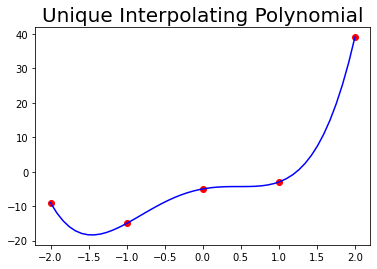

In [3]:
# This program uses built-in interpolating polynomial function using polyfit function from the numpy library

import numpy as np
import matplotlib.pyplot as plt
# enter the points
x = np.array([0,1,-1,2,-2])
y = np.array([-5,-3,-15,39,-9])

# plot the points
plt.plot(x,y,'ro')

# polynomial coefficients, use the polyfit function with degree equal to the number of points minus one.
pol = np.polyfit(x,y,len(x)-1) # len(x)-1 is the degree of the unique interpolating polynomial
print(f'\n The coefficients of the unique interpolating polynomial of degree {len(x)-1} are \n',pol)

# Plot the interpolating polynomial
xx = np.linspace(min(x),max(x))
# evaluate the interpolating polynomial at the xx points 
yy = np.polyval(pol,xx)
plt.plot(xx, yy, 'b')
plt.title('Unique Interpolating Polynomial', fontsize='20')

## 3. Interpolating Polynomial

Consider the following data set $(-1,1.5), (0,3), (1,6), (2,12), (3,24)$. Find the interpolating polynomial using Newton's method.


 The coefficients of the unique interpolating polynomial of degree 4 are 
 [0.0625 0.125  0.6875 2.125  3.    ]

 The interpolating polynomial is: 
 
 3.0+2.124999999999997x+0.6875000000000006x^2
      +0.12500000000000014x^3+0.062499999999999806x^4


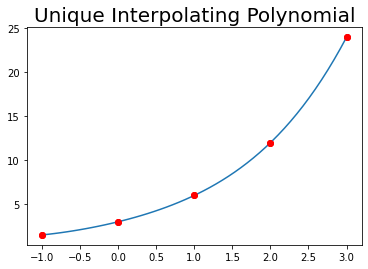

In [11]:
# This program uses built-in interpolating polynomial function using polyfit function from the numpy library

import numpy as np
import matplotlib.pyplot as plt
# enter the points
x = np.array([-1,0,1,2,3])
y = np.array([1.5,3,6,12,24])

# plot the points
plt.plot(x,y,'ro')

# polynomial coefficients, use the polyfit function with degree equal to the number of points minus one.
pol = np.polyfit(x,y,len(x)-1)  
print(f'\n The coefficients of the unique interpolating polynomial of degree {len(x)-1} are \n',pol)

# Plot the interpolating polynomial
xx = np.linspace(min(x),max(x))
# evaluate the interpolating polynomial at the xx points 
yy = np.polyval(pol,xx)
plt.plot(xx, yy, '-',x, y, 'ro')
plt.title('Unique Interpolating Polynomial', fontsize='20')

print(f'''\n The interpolating polynomial is: \n \n {pol[len(pol)-1]}+{pol[len(pol)-2]}x+{pol[len(pol)-3]}x^2
      +{pol[len(pol)-4]}x^3+{pol[len(pol)-5]}x^4''')

## 4. Taylor Polynomial: Consider the function $f(x)=\sin(x)$. 

a. Find the Taylor polynomial of degree 5 that approximates this function near $x_0=0$.

b. Estimate the error of the approximation at $x=0.8$.

c. Write a program that plots a graph showing, $f$, the approximating Taylor polynomial of degree 5, and the error at the point $x=0.8$.

## This is the documentation for the built-in approximate_taylor_polynomial from the interpolate package in scipy library:
scipy.interpolate.approximate_taylor_polynomial(f, x, degree, scale, order=None)

Estimate the Taylor polynomial of f at x by polynomial fitting.

**Parameters**

f callable

The function whose Taylor polynomial is sought. Should accept a vector of x values.

x scalar

The point at which the polynomial is to be evaluated.

degree int

The degree of the Taylor polynomial

scales calar

The width of the interval to use to evaluate the Taylor polynomial. Function values spread over a range this wide are used to fit the polynomial. Must be chosen carefully.

order int or None, optional

The order of the polynomial to be used in the fitting; f will be evaluated order+1 times. If None, use degree.

**Returns**

ppoly1d instance

The Taylor polynomial (translated to the origin, so that for example p(0)=f(x)).

In [6]:
import numpy as np
# Using Vandermonde method
# The coefficient matrix of the interpolating polynomial is the Vandermonde matrix:
V=np.array([[1,-1,1, -1,1],[1, 0,0,0,0],[1,1,1,1,1],[1,2,4,8,16],[1,3,9,27,81]])

# enter the vector of y-values
y=np.array([1.5,3,6,12,24])

# Deduce the vector b of the coefficients of the interpolating polynomial b=(V^(-1)*y)
b=(np.linalg.inv(V)).dot(y)
print(b)


[3.     2.125  0.6875 0.125  0.0625]


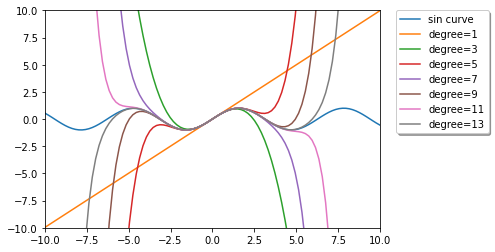

In [39]:
# This program uses built-in approximate_taylor_polynomial from the interpolate package in scipy library 

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial

x = np.linspace(-10.0, 10.0, num=100)
plt.plot(figsize=(20,10))
plt.axis([-10, 10, -10, 10])
plt.plot(x, np.sin(x), label="sin curve")
for degree in np.arange(1, 15, step=2):
     sin_taylor = approximate_taylor_polynomial(np.sin, 0, degree, 1,
                                                order=degree + 2)
     plt.plot(x, sin_taylor(x), label=f"degree={degree}")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
            borderaxespad=0.0, shadow=True)


## 5. Taylor Polynomial: Consider the function $f(x)=\cos(2x)$. 

a. Find the Taylor polynomial of degree 4 that approximates this function near $x_0=0$.

b. Estimate the error of the approximation at $x=5$. 

c. Write a program that graphs your function, its fourth degree Taylor polynomial approximation, and the error of the approximation at the point $x=5$.

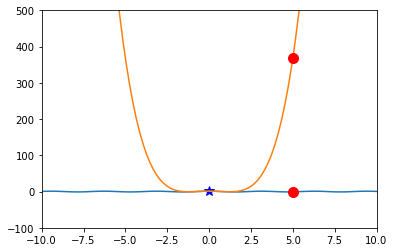

In [6]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-10.0, 10.0, num=100)
plt.plot(figsize=(20,10))
plt.axis([-10, 10, -100, 500])

# plot the point at which the function and the taylor polynomial are hooked together
plt.plot(0, np.cos(2*0),'b*' , markersize=10)

# plot the cos(2x) wave and the point I care for
plt.plot(x, np.cos(2*x), label="cos(2x) curve") # plot the cos(2x) wave
plt.plot(5, np.cos(2*5),'ro' , markersize=10) # plot the point at which am measuring the error

# plot the fourth degree Taylor polynomial and the point 
plt.plot(x, 1-2*x**2+(2/3)*x**4, label="Taylor Polynomial") # plot the cos(2x) wave
plt.plot(5, 1-2*5**2+(2/3)*5**4,'ro' , markersize=10) # plot the point at which am measuring the error

## 6. Consider an $(n+1)$-times continuously differentiable function $f$. Explain the difference between approximating $f$ with a Taylor polynomial of degree $n$ ($T_n(x)$) and approximating $f$ with an interpolating polynomial of degree $n$ ($P_n(x)$).